# CNN Model

C:\Users\hoabu\PycharmProjects\pythonProject\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 465ms/step - accuracy: 0.4200 - loss: 1.5068 - val_accuracy: 0.5189 - val_loss: 1.5185
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 435ms/step - accuracy: 0.8442 - loss: 0.4307 - val_accuracy: 0.6432 - val_loss: 1.7025
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 443ms/step - accuracy: 0.9142 - loss: 0.2072 - val_accuracy: 0.6703 - val_loss: 1.8774
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 500ms/step - accuracy: 0.9274 - loss: 0.1825 - val_accuracy: 0.6703 - val_loss: 1.9321
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 500ms/step - accuracy: 0.9430 - loss: 0.1585 - val_accuracy: 0.6784 - val_loss: 1.9110
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 434ms/step - accuracy: 0.9456 - loss: 0.1432 - val_accuracy: 0.7054 - val_loss: 1.6161
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.9520 - loss: 0.1142 - val_accuracy: 0.6838 - val_loss: 1.7450
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.9381 - loss: 0.1976 - 

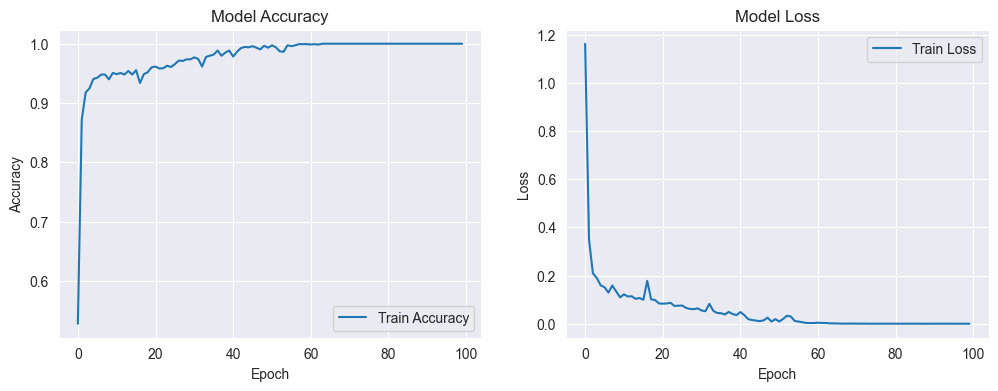

Time taken for training: 2247.97 seconds
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9160 - loss: 1.0088
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step
Test accuracy: 0.8222697973251343
Time taken for testing: 1.67 seconds
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.84      0.77        63
     Class 1       0.87      0.87      0.87       179
     Class 2       0.75      0.86      0.80       133
     Class 3       1.00      0.67      0.81        92

    accuracy                           0.82       467
   macro avg       0.83      0.81      0.81       467
weighted avg       0.84      0.82      0.82       467



In [1]:
import os
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report

class CXRModel:
    def __init__(self, train_images_dir, train_labels_dir, test_images_dir, test_labels_dir, num_classes, image_height=150, image_width=150):
        self.train_images_dir = train_images_dir
        self.train_labels_dir = train_labels_dir
        self.test_images_dir = test_images_dir
        self.test_labels_dir = test_labels_dir
        self.image_height = image_height
        self.image_width = image_width
        self.num_classes = num_classes
        self.model = None

    def load_data(self, images_dir, labels_dir):
        images = []
        labels = []
        for image_file in os.listdir(images_dir):
            if image_file.endswith('.jpg'):
                label_file = image_file.replace('.jpg', '.txt')
                label_path = os.path.join(labels_dir, label_file)
                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        label_data = f.readline().strip().split()
                        if len(label_data) > 0:
                            label = int(label_data[0])  
                            image_path = os.path.join(images_dir, image_file)
                            image = load_img(image_path, target_size=(self.image_height, self.image_width))
                            image = img_to_array(image) / 255.0
                            images.append(image)
                            labels.append(label)
        return np.array(images), np.array(labels)

    def build_model(self):
        self.model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(self.image_height, self.image_width, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(self.num_classes, activation='softmax')  
        ])

        # Biên dịch mô hình
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy',  
                           metrics=['accuracy'])

    def train(self, epochs=50):
        X_train, y_train = self.load_data(self.train_images_dir, self.train_labels_dir)
        y_train = to_categorical(y_train, num_classes=self.num_classes)  
        start_time = time.time()
        history = self.model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
        training_time = time.time() - start_time

        self.plot_history(history)
        print(f'Time taken for training: {training_time:.2f} seconds')

    def evaluate(self):
        X_test, y_test = self.load_data(self.test_images_dir, self.test_labels_dir)
        y_test_categorical = to_categorical(y_test, num_classes=self.num_classes)  
        start_time = time.time()
        test_loss, test_acc = self.model.evaluate(X_test, y_test_categorical)
        testing_time = time.time() - start_time

        y_pred = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1) 

        print(f'Test accuracy: {test_acc}')
        print(f'Time taken for testing: {testing_time:.2f} seconds')
        print("Classification Report:")
        print(classification_report(y_test, y_pred_classes, target_names=[f'Class {i}' for i in range(self.num_classes)]))

    def plot_history(self, history):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

    def save_model(self, model_path='CNN_alone.h5'):
        self.model.save(model_path)

num_classes = 4
train_images_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\train\\images'
train_labels_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\train\\labels'
test_images_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\valid\\images'
test_labels_dir = 'D:\\Introduction for AI\\AIFinal\\data\\Lung_CT_Scan\\valid\\labels'

# Khởi tạo mô hình
cxr_model = CXRModel(train_images_dir, train_labels_dir, test_images_dir, test_labels_dir, num_classes)
cxr_model.build_model()
cxr_model.train(epochs=100)
cxr_model.evaluate()
cxr_model.save_model()